In [710]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import seaborn as sns
import sys
sys.path.append('..')
sys.path.append('../..')
sys.path.append('.')
sys.path.append('./scripts')
from simulations_util import *
from util import  apply_splitting_strategy
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', None)

In [711]:
dgp = "poly" # "linear", "linear_lss" "linear_poly" "poly", "lss"
data = "openml_361259" # "openml_361242" "openml_361251" "openml_361253" "openml_361254" "openml_361256" "openml_361259" "openml_361260" "openml_361622"
ablation_directory = f"/accounts/projects/binyu/zhongyuan_liang/local_MDI+/imodels-experiments/feature_importance/results/mdi_local.real_data_regression_{data}_{dgp}/{data}_{dgp}/varying_heritability"
folder_names = [folder for folder in os.listdir(ablation_directory) if os.path.isdir(os.path.join(ablation_directory, folder))]
experiments_seeds = []
for folder_name in folder_names:
    experiments_seeds.append(int(folder_name[4:]))
combined_df = pd.DataFrame()
for seed in experiments_seeds:
    df = pd.read_csv(os.path.join(ablation_directory, f"seed{seed}/results.csv"))
    combined_df = pd.concat([combined_df, df], ignore_index=True)

# rf_plus_directory = f'/scratch/users/zhongyuan_liang/saved_models/auroc/linear/'
# combined_df_rf_plus = pd.DataFrame()
# for file in os.listdir(rf_plus_directory):
#     if file.endswith(".csv"):
#         df = pd.read_csv(os.path.join(rf_plus_directory, file))
#         combined_df_rf_plus = pd.concat([combined_df_rf_plus, df], ignore_index=True)

In [712]:
combined_df

,rep,heritability,heritability_name,n_estimators,min_samples_leaf,max_features,random_state,model,fi,train_size,test_size,num_features,data_split_seed,support_0,support_1,support_2,support_3,support_4,support_5,auroc_train,auprc_train,auroc_test,auprc_test,split_seed
0,0,0.1,0.1,100,5,0.33,42,RF,LIME_RF,1340,660,32,1,5,10,17,20,24,31,0.465868,0.207203,0.466220,0.205649,1
1,0,0.1,0.1,100,5,0.33,42,RF,Local_MDI+_MDI_elasticnet_fit_on_all_ranking_R...,1340,660,32,1,5,10,17,20,24,31,0.435869,0.196734,0.429380,0.194584,1
2,0,0.1,0.1,100,5,0.33,42,RF,Local_MDI+_MDI_lasso_fit_on_all_ranking_RFPlus,1340,660,32,1,5,10,17,20,24,31,0.426146,0.190862,0.419551,0.188160,1
3,0,0.1,0.1,100,5,0.33,42,RF,Local_MDI+_MDI_ridge_fit_on_all_ranking_RFPlus,1340,660,32,1,5,10,17,20,24,31,0.435496,0.197452,0.428492,0.194872,1
4,0,0.1,0.1,100,5,0.33,42,RF,MDI,1340,660,32,1,5,10,17,20,24,31,0.496924,0.265357,0.481167,0.248513,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,0,0.8,0.8,100,5,0.33,42,RF,Local_MDI+_MDI_lasso_fit_on_all_ranking_RFPlus,1340,660,32,1,5,10,17,20,24,31,0.681049,0.343879,0.671766,0.335897,1
276,0,0.8,0.8,100,5,0.33,42,RF,Local_MDI+_MDI_ridge_fit_on_all_ranking_RFPlus,1340,660,32,1,5,10,17,20,24,31,0.634345,0.318956,0.624835,0.311081,1
277,0,0.8,0.8,100,5,0.33,42,RF,MDI,1340,660,32,1,5,10,17,20,24,31,0.609835,0.387977,0.583809,0.357154,1
278,0,0.8,0.8,100,5,0.33,42,RF,Random,1340,660,32,1,5,10,17,20,24,31,0.497646,0.264803,0.495814,0.267517,1


In [713]:
combined_df["fi"].unique()

array(['LIME_RF', 'Local_MDI+_MDI_elasticnet_fit_on_all_ranking_RFPlus',
       'Local_MDI+_MDI_lasso_fit_on_all_ranking_RFPlus',
       'Local_MDI+_MDI_ridge_fit_on_all_ranking_RFPlus', 'MDI', 'Random',
       'TreeSHAP_RF'], dtype=object)

In [714]:
#assert combined_df.shape[0] == 520

In [715]:
# support_columns = [col for col in combined_df.columns if col.startswith('support')]
# unique_combinations = combined_df[support_columns].drop_duplicates()
# unique_combinations

### Correlation

In [716]:
# X = sample_real_data_X(source="openml", task_id = 361622)#int(data.split("_")[1]))
# y = sample_real_data_y(source="openml", task_id = 361622)#int(data.split("_")[1]), return_support=False)

In [717]:
# convert X to pandas dataframe
# X = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
# X.corr()

In [718]:
# X_train, X_tune, X_test, y_train, y_tune, y_test = apply_splitting_strategy(X, y, "train-test", 1)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# df = pd.DataFrame(X_train)
# corr = df.corr()
# corr = np.triu(corr, k=1)
# np.mean(np.abs(corr[corr != 0]))

##### Plot AUROC/RBO Performance

In [719]:
combined_df["train_size"].unique()

array([1340])

In [720]:
combined_df["test_size"].unique()

array([660])

In [721]:
result_df = combined_df.groupby(['train_size', 'heritability', 'fi'])[["auroc_train", "auroc_test", "auprc_train", "auprc_test"]].mean().reset_index()

In [722]:
methods = [
    'TreeSHAP_RF',
    'LIME_RF',
    #'Random',
    'MDI',
    # 'Local_MDI+_MDI_ridge_fit_on_all_ranking_RFPlus',
    # 'Local_MDI+_MDI_elasticnet_fit_on_all_ranking_RFPlus',
    'Local_MDI+_MDI_lasso_fit_on_all_ranking_RFPlus',
]


# color_map = {
#     # Core methods
#     #'Random': 'gray',  # Neutral color
#     'LIME_RF': '#71BEB7',  # Turquoise
#     'TreeSHAP_RF': 'orange',  # Distinctive orange
#     'MDI': '#8B4513',  # Brown for distinction

#     # Local MDI+ without bootstrap
#     'Local_MDI+_Alo_fit_on_all_ranking_RFPlus': '#FF5733',  # Bright red-orange
#     'Local_MDI+_MDI_fit_on_all_ranking_RFPlus': 'black',  # Neutral black
#     'Local_MDI+_MDI_ridge_fit_on_all_ranking_RFPlus': '#3357FF',  # Blue
#     'Local_MDI+_MDI_lasso_fit_on_all_ranking_RFPlus': '#FF33A1',  # Pink
#     'Local_MDI+_MDI_elasticnet_fit_on_all_ranking_RFPlus': '#E91E63',  # Deep pink

#     # Local MDI+ with bootstrap
#     'Local_MDI+_MDI_fit_on_all_ranking_bootstrap_RFPlus': '#9C27B0',  # Purple
#     'Local_MDI+_MDI_ridge_fit_on_all_ranking_bootstrap_RFPlus': '#607D8B',  # Gray-blue
#     'Local_MDI+_MDI_lasso_fit_on_all_ranking_bootstrap_RFPlus': '#4CAF50',  # Green
#     'Local_MDI+_MDI_elasticnet_fit_on_all_ranking_bootstrap_RFPlus': '#FFC107',  # Amber
# }
color_map = {
    # Core methods
    'Random': 'gray',  # Neutral color
    'LIME_RF': '#71BEB7',  # Turquoise
    'TreeSHAP_RF': 'orange',  # Distinctive orange
    'MDI': '#8B4513',  # Brown for distinction

    'Local_MDI+_MDI_ridge_fit_on_all_ranking_RFPlus': '#673AB7',  # Indigo
    'Local_MDI+_MDI_elasticnet_fit_on_all_ranking_RFPlus': '#D4AC0D',  # Pink
    'Local_MDI+_MDI_lasso_fit_on_all_ranking_RFPlus': '#FF33A1',  # Amber

    'Local_MDI+_MDI_fit_on_oob_ranking_RFPlus': '#009688',  # Teal
    'Local_MDI+_MDI_fit_on_oob_best_ranking_RFPlus': '#FFC107',  # Goldenrod
    'Local_MDI+_MDI_ridge_fit_on_oob_ranking_RFPlus': '#607D8B',  # Gray-blue
    'Local_MDI+_MDI_elasticnet_fit_on_oob_ranking_RFPlus': '#FF5733',  # Bright red-orange
    'Local_MDI+_MDI_lasso_fit_on_oob_ranking_RFPlus': '#E91E63',  # Deep pink
}

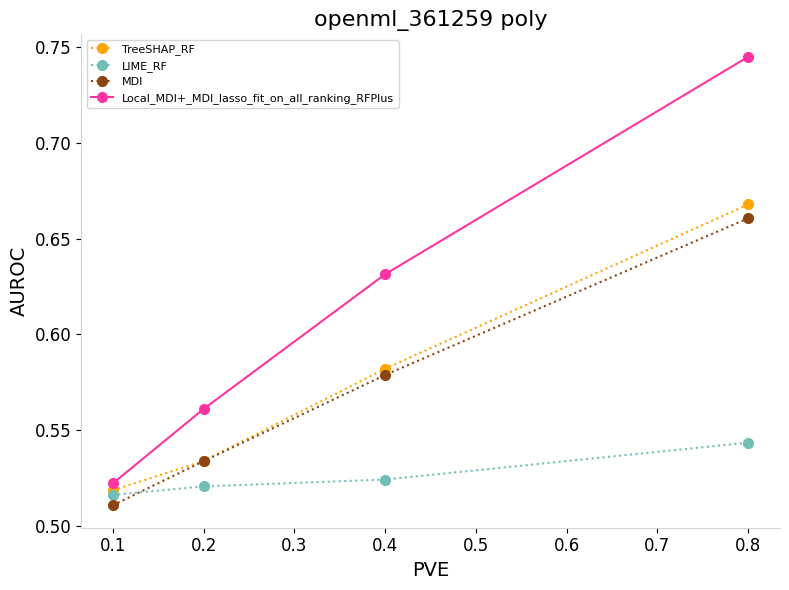

In [723]:
# Set global parameters for plots
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Remove chartjunk: Remove right and top spines, and change edge color to light grey
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.edgecolor'] = 'lightgrey'

# Define marker size
marker_size = 7

# Create a single subplot for AUROC Test
fig, ax = plt.subplots(figsize=(8, 6))

# Define the DataFrame
df = result_df

# List of methods with dotted line style
dotted_methods = ['LIME_RF', 'TreeSHAP_RF', 'MDI']

# Plot AUROC Test
for method in methods:
    subset = df[df['fi'] == method]
    if method in dotted_methods:
        ax.plot(
            subset['heritability'], subset['auroc_test'],
            label=method, linestyle="dotted", color=color_map[method], marker='o', markersize=marker_size
        )
    else:
        ax.plot(
            subset['heritability'], subset['auroc_test'],
            label=method, linestyle="solid", color=color_map[method], marker='o', markersize=marker_size
        )

# Set labels, title, and legend
ax.set_title(data+" "+dgp, fontsize=16)
ax.set_xlabel('PVE', fontsize=14)
ax.set_ylabel('AUROC', fontsize=14)
ax.legend(fontsize=8, title_fontsize=10, loc='best')

# Adjust layout and show plot
plt.tight_layout()
plt.savefig(f'auroc_{data}_{dgp}.png')
plt.show()


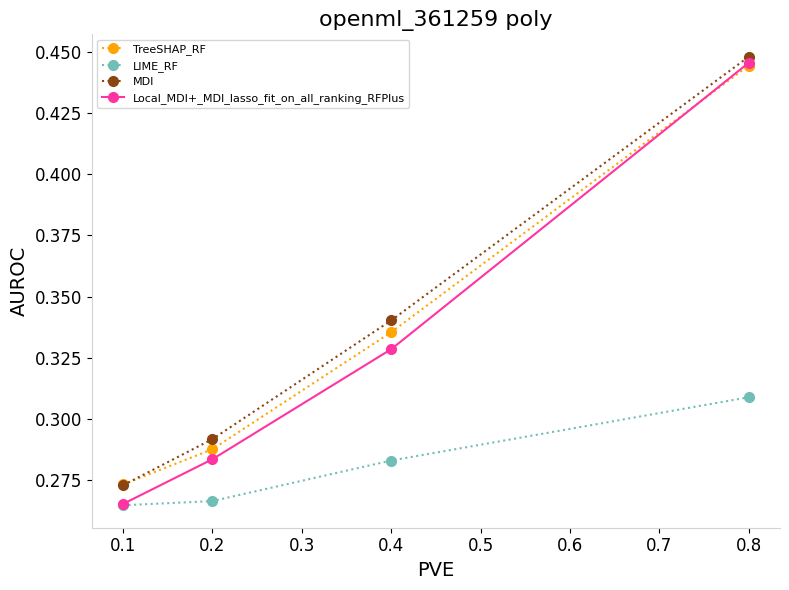

In [724]:
# Set global parameters for plots
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Remove chartjunk: Remove right and top spines, and change edge color to light grey
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.edgecolor'] = 'lightgrey'

# Define marker size
marker_size = 7

# Create a single subplot for AUROC Test
fig, ax = plt.subplots(figsize=(8, 6))

# Define the DataFrame
df = result_df

# List of methods with dotted line style
dotted_methods = ['LIME_RF', 'TreeSHAP_RF', 'MDI']

# Plot AUROC Test
for method in methods:
    subset = df[df['fi'] == method]
    if method in dotted_methods:
        ax.plot(
            subset['heritability'], subset['auprc_test'],
            label=method, linestyle="dotted", color=color_map[method], marker='o', markersize=marker_size
        )
    else:
        ax.plot(
            subset['heritability'], subset['auprc_test'],
            label=method, linestyle="solid", color=color_map[method], marker='o', markersize=marker_size
        )

# Set labels, title, and legend
ax.set_title(data+" "+dgp, fontsize=16)
ax.set_xlabel('PVE', fontsize=14)
ax.set_ylabel('AUROC', fontsize=14)
ax.legend(fontsize=8, title_fontsize=10, loc='best')

# Adjust layout and show plot
plt.tight_layout()
# plt.savefig(f'auroc_{data}_{dgp}.png')
plt.show()


In [725]:
assert False

AssertionError: 

In [ ]:
# Set global parameters for plots
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Remove chartjunk: Remove right and top spines, and change edge color to light grey
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.edgecolor'] = 'lightgrey'

# Define marker size
marker_size = 7

# Create a single subplot for AUROC Test
fig, ax = plt.subplots(figsize=(8, 6))

# Define the DataFrame
df = result_df

# List of methods with dotted line style
dotted_methods = ['LIME_RF', 'TreeSHAP_RF']

# Plot AUROC Test
for method in methods:
    subset = df[df['fi'] == method]
    ax.plot(
        subset['heritability'], subset['auroc_train'],
        label=method, linestyle="solid", color=color_map[method], marker='o', markersize=marker_size
    )

# Set labels, title, and legend
ax.set_title(data+" "+dgp, fontsize=16)
ax.set_xlabel('PVE', fontsize=14)
ax.set_ylabel('AUROC', fontsize=14)
ax.legend(fontsize=8, title_fontsize=10, loc='best')

# Adjust layout and show plot
plt.tight_layout()
# plt.savefig('auroc_lss.png')
plt.show()